In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [23]:

columns = ['Price', 'Maintenance', 'Doors', 'Passengers', 'Luggage', 'Safety', 'Evaluation']


df = pd.read_csv('car_evaluation.csv', names=columns, header=None)
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()


,Price,Maintenance,Doors,Passengers,Luggage,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        1728 non-null   object
 1   Maintenance  1728 non-null   object
 2   Doors        1728 non-null   object
 3   Passengers   1728 non-null   object
 4   Luggage      1728 non-null   object
 5   Safety       1728 non-null   object
 6   Evaluation   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df.isnull().sum()


Price          0
Maintenance    0
Doors          0
Passengers     0
Luggage        0
Safety         0
Evaluation     0
dtype: int64

In [13]:
df.describe(include='all')


,Price,Maintenance,Doors,Passengers,Luggage,Safety,Evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


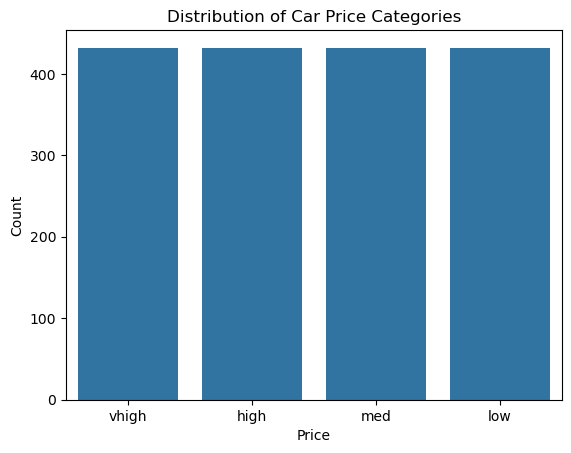

In [14]:
sns.countplot(x='Price', data=df)
plt.title('Distribution of Car Price Categories')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


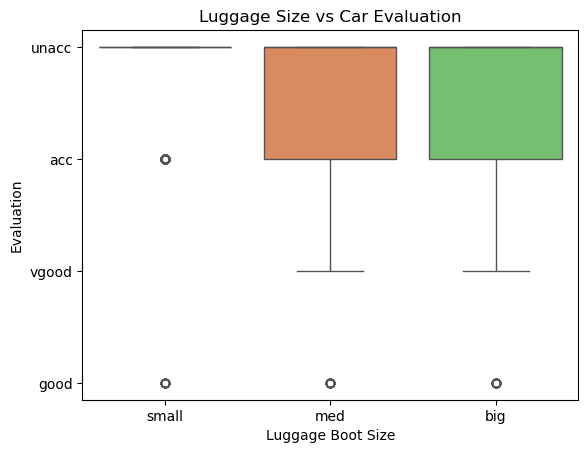

In [20]:
sns.boxplot(x='Luggage', y='Evaluation', hue='Luggage', data=df, palette='muted', dodge=False)
plt.title('Luggage Size vs Car Evaluation')
plt.xlabel('Luggage Boot Size')
plt.ylabel('Evaluation')
plt.legend([],[], frameon=False)  
plt.show()



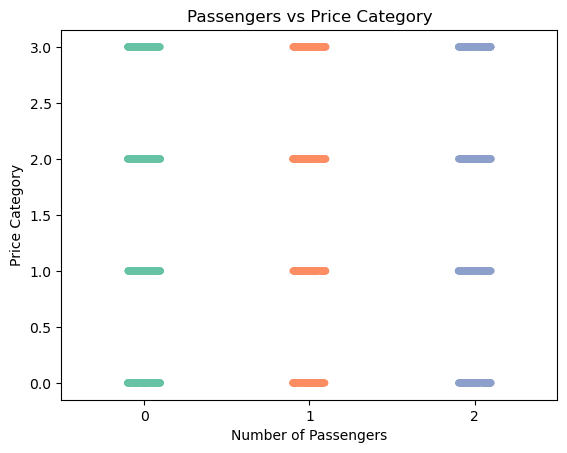

In [28]:

sns.stripplot(x='Passengers', y='Price', data=df, palette='Set2', hue='Passengers', dodge=False, legend=False)
plt.title('Passengers vs Price Category')
plt.xlabel('Number of Passengers')
plt.ylabel('Price Category')
plt.show()






In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])


In [32]:
X = df.drop('Evaluation', axis=1)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


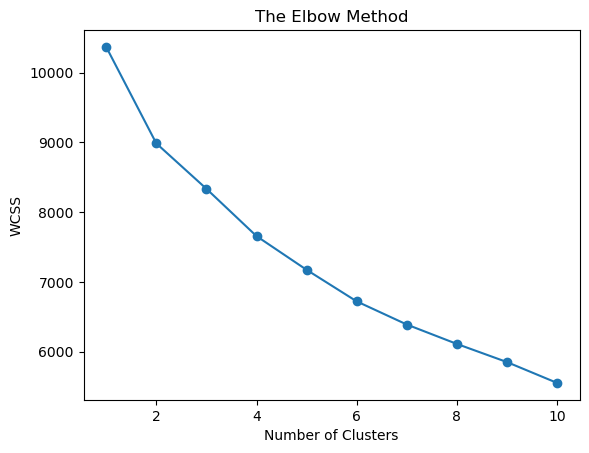

In [34]:


for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [35]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=4, random_state=42)

In [36]:
clusters = kmeans.predict(X_scaled)
df['Cluster'] = clusters


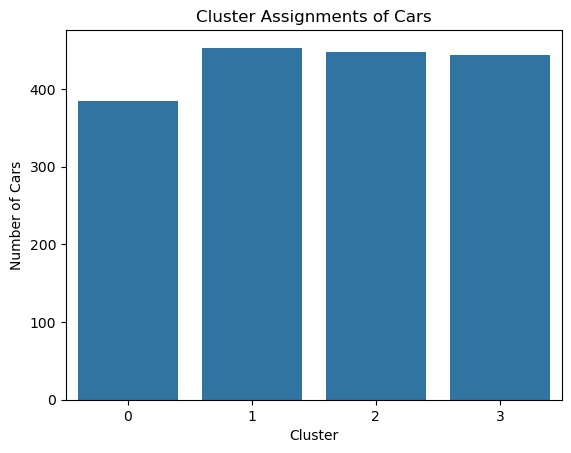

In [37]:
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Assignments of Cars')
plt.xlabel('Cluster')
plt.ylabel('Number of Cars')
plt.show()


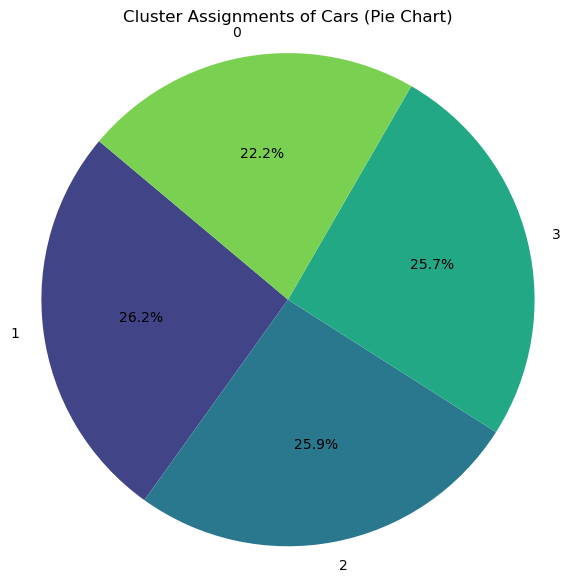

In [39]:

cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(cluster_counts)))
plt.title('Cluster Assignments of Cars (Pie Chart)')
plt.axis('equal')  
plt.show()


In [38]:

new_cars = pd.DataFrame({
    'Price': [2, 0],         
    'Maintenance': [2, 1],
    'Doors': [2, 3],
    'Passengers': [3, 1],
    'Luggage': [1, 2],
    'Safety': [2, 0]
})


new_cars_scaled = scaler.transform(new_cars)


new_clusters = kmeans.predict(new_cars_scaled)
print("Predicted Cluster Assignments:", new_clusters)


Predicted Cluster Assignments: [1 0]
